In [26]:
import pandas as pd
import os

ubisoft = pd.read_csv('./data/depreciated/ubisoft_100_hot_posts.csv')
ubisoft.head()



,title,score,id,url,num_comments,body,author,created_utc
0,Lost access to your Ubisoft Account?,13,1f3bst4,https://www.reddit.com/r/ubisoft/comments/1f3b...,0,There is nothing we can do but tell you to fil...,Voddy_,1.724856e+09
1,China's Tencent is considering buying Ubisoft:...,796,1fw0e08,https://i.redd.it/6r4yfr1a1rsd1.jpeg,1156,The Guillemot family and Tencent are in talks ...,MERKAT44,1.728052e+09
2,Probably one of the most stressful chase scene...,37,1g5kf9c,https://v.redd.it/v1yecrrhe9vd1,2,NaN,AdministrativeCold56,1.729146e+09
3,I discovered the email of the person who stole...,19,1g5jj7h,https://www.reddit.com/gallery/1g5jj7h,32,"I've provided all the necessary details, but t...",HyperGaming_LK,1.729142e+09
4,Is Ubisoft Connect down? I can't access any of...,0,1g5nfcw,https://www.reddit.com/r/ubisoft/comments/1g5n...,0,[I know Ubi is going through a lot of trouble ...,DeadTamagotchi3,1.729160e+09


In [27]:
ubisoft = ubisoft.drop(columns=['score', 'num_comments', 'author', 'created_utc', 'url'])
ubisoft = ubisoft.dropna()
ubisoft.head()

,title,id,body
0,Lost access to your Ubisoft Account?,1f3bst4,There is nothing we can do but tell you to fil...
1,China's Tencent is considering buying Ubisoft:...,1fw0e08,The Guillemot family and Tencent are in talks ...
3,I discovered the email of the person who stole...,1g5jj7h,"I've provided all the necessary details, but t..."
4,Is Ubisoft Connect down? I can't access any of...,1g5nfcw,[I know Ubi is going through a lot of trouble ...
5,Connection lost when trying to launch AC Unity...,1g5m0p7,"I tried so many YT fixes for this one, Tried t..."


In [28]:
# Load the regular expression library
import re
# Remove punctuation
ubisoft['body_processed'] = \
ubisoft['body'].map(lambda x: re.sub('[,\.!?]', '', x))
# Convert the titles to lowercase
ubisoft['body_processed'] = \
ubisoft['body_processed'].map(lambda x: x.lower())
# Print out the first rows of ubisoft
ubisoft['body_processed'].head()

<>:5: DeprecationWarning: invalid escape sequence '\.'
<>:5: DeprecationWarning: invalid escape sequence '\.'
/var/folders/wk/27zdp1q12l9dx34w5ml48nrw0000gn/T/ipykernel_50576/2563387572.py:5: DeprecationWarning: invalid escape sequence '\.'
  ubisoft['body'].map(lambda x: re.sub('[,\.!?]', '', x))


0    there is nothing we can do but tell you to fil...
1    the guillemot family and tencent are in talks ...
3    i've provided all the necessary details but th...
4    [i know ubi is going through a lot of trouble ...
5    i tried so many yt fixes for this one tried to...
Name: body_processed, dtype: object

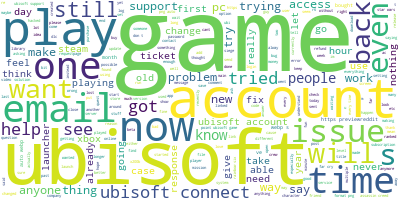

In [12]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(ubisoft['body_processed'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [30]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['ubisoft', 'game', 'play', 'Ubisoft', 'games'])
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]
data = ubisoft.body_processed.values.tolist()
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

['nothing', 'tell', 'fill', 'account', 'recovery', 'form', 'https', 'wwwubisoftcom', 'en', 'gb', 'help', 'contactplatform', 'category', 'hidefields', 'af', 'contact', 'support', 'https', 'wwwubisoftcom', 'en', 'us', 'company', 'contact', 'us', 'wait', 'patiently', 'respond']


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sriyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [31]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 2), (5, 1), (6, 2), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 2), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 2), (20, 1), (21, 2)]


In [34]:
from pprint import pprint
# number of topics
num_topics = 5
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.011*"creed" + 0.008*"assassin" + 0.008*"shadows" + 0.006*"new" + '
  '0.005*"would" + 0.005*"issue" + 0.005*"steam" + 0.004*"get" + '
  '0.004*"download" + 0.004*"also"'),
 (1,
  '0.009*"creed" + 0.008*"assassin" + 0.007*"new" + 0.006*"try" + '
  '0.006*"account" + 0.005*"like" + 0.005*"ac" + 0.004*"shadows" + '
  '0.004*"xbox" + 0.004*"every"'),
 (2,
  '0.016*"account" + 0.007*"know" + 0.006*"get" + 0.006*"new" + 0.006*"creed" '
  '+ 0.006*"like" + 0.005*"assassin" + 0.005*"shadows" + 0.005*"made" + '
  '0.004*"way"'),
 (3,
  '0.013*"new" + 0.012*"assassin" + 0.011*"creed" + 0.010*"shadows" + '
  '0.010*"like" + 0.006*"feel" + 0.006*"ac" + 0.006*"farcry" + '
  '0.005*"gameplay" + 0.005*"makes"'),
 (4,
  '0.010*"creed" + 0.009*"assassin" + 0.008*"https" + 0.007*"new" + '
  '0.007*"shadows" + 0.005*"account" + 0.005*"know" + 0.004*"could" + '
  '0.004*"support" + 0.003*"company"')]


In [35]:
import pyLDAvis.gensim
import pickle 
import pyLDAvis
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('./results/ldavis_prepared_'+str(num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, './results/ldavis_prepared_'+ str(num_topics) +'.html')
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.017533  0.021218       1        1  31.241695
2     -0.054951 -0.012485       2        1  28.514970
1      0.026400 -0.040968       3        1  21.734903
0      0.013522  0.006498       4        1   9.590260
4     -0.002504  0.025737       5        1   8.918170, topic_info=          Term       Freq      Total Category  logprob  loglift
0      account  25.000000  25.000000  Default  30.0000  30.0000
284      creed  33.000000  33.000000  Default  29.0000  29.0000
12       https   9.000000   9.000000  Default  28.0000  28.0000
729   assassin  31.000000  31.000000  Default  27.0000  27.0000
1308   shadows  25.000000  25.000000  Default  26.0000  26.0000
...        ...        ...        ...      ...      ...      ...
95     changes   0.924171  10.835290   Topic5  -5.8752  -0.0446
779    stealth   0.864934   8.856704   Topic5  -5.9414   0.0908
553      makes   0.876195  11.543275   Topic5  -5.9285  -0.1612
220        way   0.873613  11.603648   Topic5  -5.9314  -0.1694
1152    combat   0.847961   9.237916   Topic5  -5.9612   0.0288

[366 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
521       1  0.587895   aaa
521       2  0.195965   aaa
521       3  0.195965   aaa
634       2  0.542487  able
634       3  0.271243  able
...     ...       ...   ...
173       1  0.208185  year
173       2  0.208185  year
173       3  0.208185  year
173       4  0.208185  year
173       5  0.208185  year

[568 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 3, 2, 1, 5])